In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

In [36]:
data = pd.read_csv('Catalogues/NGC1027_3.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,40.592149,59.645278,464327986660217472,0.9003,0.5016,0.965,-0.839,0.477,95,NaN,...,1.040,20.258450,21.339140,19.250103,2.089037,NaN,41.369424,40.592156,59.645276,0.933822
1,40.638617,59.649974,464328059675537408,1.0209,0.5036,1.628,-1.006,1.280,95,NaN,...,1.185,20.091894,20.983425,18.989180,1.994245,NaN,41.364275,40.638626,59.649968,1.043193
2,41.623957,59.703399,464340188661593472,0.8678,0.3916,2.502,-0.567,2.437,95,NaN,...,1.001,19.757400,21.037899,18.698357,2.339542,NaN,41.214907,41.623962,59.703388,0.893857
3,41.630926,59.702964,464340188663381632,0.7489,0.6678,1.774,-1.549,0.864,95,NaN,...,1.041,20.332478,21.273160,19.226948,2.046213,NaN,41.213118,41.630940,59.702960,0.787010
4,41.483511,59.657518,464340326100682752,0.7427,0.5238,1.400,-0.836,1.123,95,NaN,...,1.075,19.990004,20.748272,18.975832,1.772440,NaN,41.200823,41.483518,59.657513,0.767885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13265,40.123010,63.557049,515664360653388032,0.7450,0.2616,3.487,-2.423,2.508,95,NaN,...,1.010,19.263954,20.136280,18.388836,1.747444,NaN,45.019201,40.123034,63.557038,0.766723
13266,40.138478,63.544578,515664360654018432,1.0549,0.3833,3.333,-3.219,0.864,95,NaN,...,1.008,19.755924,20.753645,18.861647,1.891998,NaN,45.004979,40.138510,63.544575,1.080472
13267,40.115406,63.573539,515664425077491968,0.7873,0.2773,3.056,-2.545,1.692,95,NaN,...,1.011,19.369785,20.470224,18.432547,2.037678,NaN,45.035543,40.115432,63.573532,0.810759
13268,40.160487,63.577724,515664493796973824,0.9607,0.5460,3.436,-3.224,1.190,95,NaN,...,0.991,20.314808,21.154415,19.480960,1.673454,NaN,45.030687,40.160519,63.577718,1.001525


In [37]:
df1 = pd.read_csv('Catalogues/NGC1027_norm_4.csv')
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,-0.112950,-2.142779,0.368494,-0.833014,0.948684,0.375774
1,-0.089398,-2.138039,0.188274,0.111977,0.657016,1.490401
2,0.410000,-2.084065,0.662026,1.473566,1.719470,-0.031520
3,0.413537,-2.084496,-0.397711,-0.377582,0.816918,-1.120425
4,0.338819,-2.130415,0.371731,-0.072784,-0.025462,-1.315332
...,...,...,...,...,...,...
13265,-0.350716,1.809593,-1.340898,1.557120,-0.102373,-1.327174
13266,-0.342872,1.797000,-2.199911,-0.377582,0.342409,1.870321
13267,-0.354569,1.826258,-1.472556,0.596830,0.790656,-0.878392
13268,-0.331717,1.830488,-2.205306,0.006063,-0.330035,1.065752


In [38]:
#df1 = df1.to_pandas()
df1 = df1.fillna(0).values 

In [39]:
df1 = pd.DataFrame(df1)

In [40]:
df1= df1.rename(columns={0: 'RAJ2000', 1: 'DEJ2000', 2: 'pmRA', 3 : 'pmDE', 4: 'BP-RP',
                         5: 'Plx_corr'})
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,-0.112950,-2.142779,0.368494,-0.833014,0.948684,0.375774
1,-0.089398,-2.138039,0.188274,0.111977,0.657016,1.490401
2,0.410000,-2.084065,0.662026,1.473566,1.719470,-0.031520
3,0.413537,-2.084496,-0.397711,-0.377582,0.816918,-1.120425
4,0.338819,-2.130415,0.371731,-0.072784,-0.025462,-1.315332
...,...,...,...,...,...,...
13265,-0.350716,1.809593,-1.340898,1.557120,-0.102373,-1.327174
13266,-0.342872,1.797000,-2.199911,-0.377582,0.342409,1.870321
13267,-0.354569,1.826258,-1.472556,0.596830,0.790656,-0.878392
13268,-0.331717,1.830488,-2.205306,0.006063,-0.330035,1.065752


In [41]:
gmm = GaussianMixture(n_components = 5, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [42]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [43]:
df1.cluster.value_counts()

cluster
2    4108
4    2991
0    2554
1    2360
3    1257
Name: count, dtype: int64

In [44]:
df2 = data.assign(cluster=df1["cluster"])

In [45]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]
a4 = df2[df2["cluster"]==3]
a5 = df2[df2["cluster"]==4]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

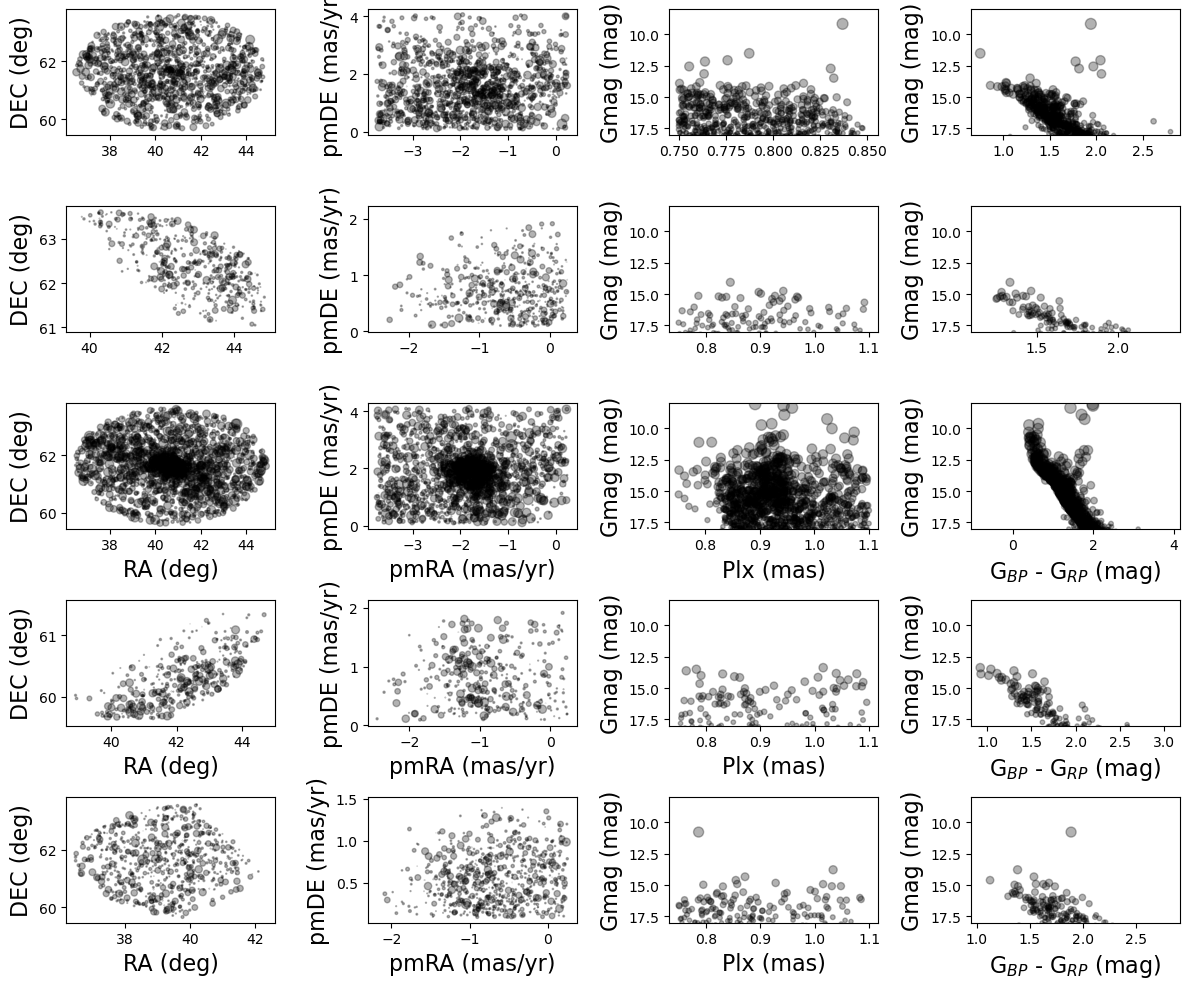

In [46]:
fig,ax = plt.subplots(5,4, figsize=(12,10),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[3,0].scatter(a4.RAJ2000, a4.DEJ2000, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,0].set_xlabel("RA (deg)",fontsize=16)
ax[3,0].set_ylabel("DEC (deg)",fontsize=16)
ax[3,1].scatter(a4.pmRA, a4.pmDE, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[3,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[3,2].scatter(a4.Plx_corr, a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,2].set_ylim(18,8)
ax[3,2].set_xlabel("Plx (mas)",fontsize=16)
ax[3,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3,3].scatter(a4["BP-RP"], a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,3].set_ylim(18,8)
ax[3,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[3,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[4,0].scatter(a5.RAJ2000, a5.DEJ2000, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,0].set_xlabel("RA (deg)",fontsize=16)
ax[4,0].set_ylabel("DEC (deg)",fontsize=16)
ax[4,1].scatter(a5.pmRA, a5.pmDE, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[4,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[4,2].scatter(a5.Plx_corr, a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,2].set_ylim(18,8)
ax[4,2].set_xlabel("Plx (mas)",fontsize=16)
ax[4,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[4,3].scatter(a5["BP-RP"], a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,3].set_ylim(18,8)
ax[4,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[4,3].set_ylabel("Gmag (mag)",fontsize=16)

## Try 2

In [47]:
gmm = GaussianMixture(n_components = 3, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [48]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [49]:
df1.cluster.value_counts()

cluster
1    4914
0    4248
2    4108
Name: count, dtype: int64

In [50]:
df2 = data.assign(cluster=df1["cluster"])

In [51]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

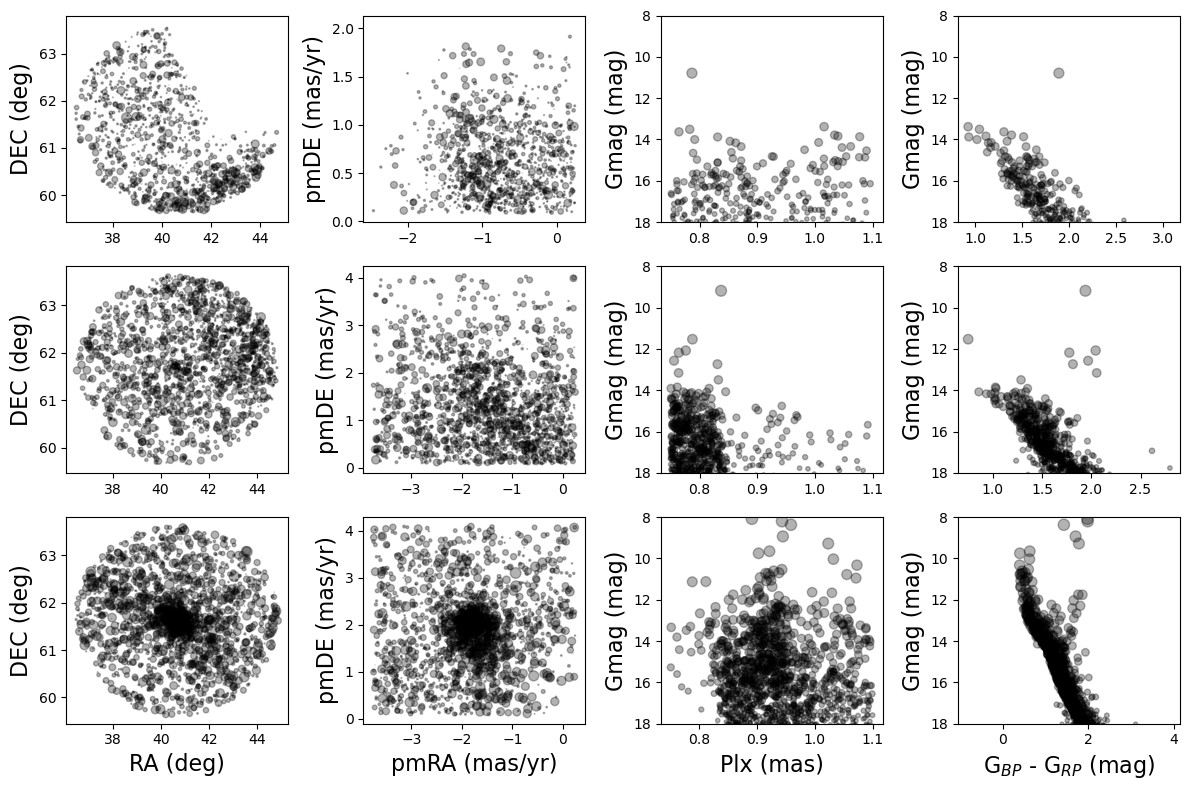

In [52]:
fig,ax = plt.subplots(3,4, figsize=(12,8),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)


## Try 3

In [21]:
gmm = GaussianMixture(n_components = 2, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [22]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [23]:
df1.cluster.value_counts()

cluster
0    6776
1    6494
Name: count, dtype: int64

In [24]:
df2 = data.assign(cluster=df1["cluster"])

In [27]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]

Text(0, 0.5, 'Gmag (mag)')

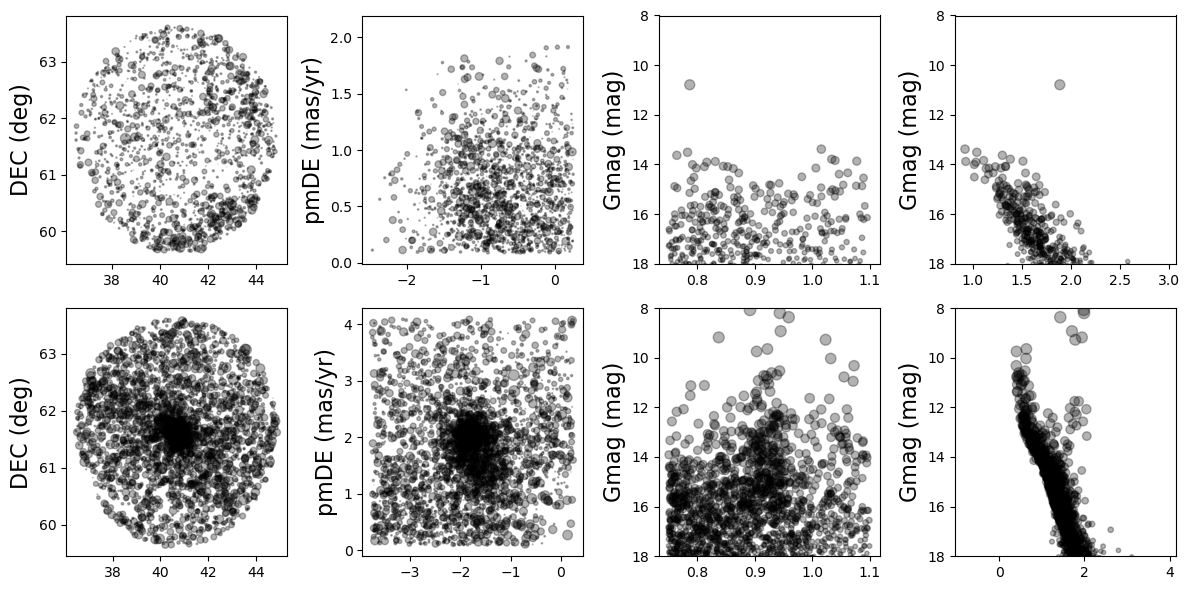

In [29]:
fig,ax = plt.subplots(2,4, figsize=(12,6),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)


In [53]:
a3 = a3.drop(columns=["cluster"])

In [32]:
a1

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
1,226.540815,-56.317269,5880538895205342848,1.2212,-7.561,-3.855,95,NaN,1.2681,1.020,20.414282,21.562517,19.130104,2.432413,NaN,-37.108574,226.540876,-56.317251,1.178051
6,226.486014,-56.259646,5880539999013530240,1.3248,-6.493,-4.649,95,NaN,1.2593,1.095,20.303038,21.424482,18.701237,2.723246,NaN,-37.064888,226.486066,-56.259625,1.279951
7,226.948946,-56.298907,5880548657675042688,1.2709,-7.299,-4.039,95,NaN,1.3149,1.015,20.301525,21.490753,19.159494,2.331259,NaN,-37.013984,226.949004,-56.298889,1.243095
8,227.291515,-56.203286,5880553017058278656,1.2268,-6.955,-4.249,95,NaN,1.3698,1.040,19.986824,21.398617,18.599062,2.799555,NaN,-36.859565,227.291570,-56.203267,1.212646
9,227.336485,-56.170772,5880553193167640576,1.2236,-6.473,-6.232,31,1.537,NaN,1.060,13.967035,14.326902,13.421547,0.905355,-21.07,-36.820520,227.336537,-56.170745,1.264165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,226.740458,-52.452474,5900298807075763712,1.3281,-5.750,-4.136,95,NaN,1.3074,0.989,20.389110,21.277702,19.652750,1.624952,NaN,-33.427750,226.740500,-52.452456,1.301355
16707,226.453067,-52.509047,5900300456342555520,1.1632,-8.663,-3.604,95,NaN,1.4698,0.962,20.393826,21.527254,19.700907,1.826347,NaN,-33.538558,226.453130,-52.509031,1.172742
16709,226.449560,-52.506863,5900300456374222720,1.3185,-5.452,-3.848,95,NaN,1.2504,1.021,20.196398,20.947050,19.314562,1.632488,NaN,-33.537197,226.449600,-52.506846,1.275855
16710,226.466252,-52.457901,5900300662501540096,1.2761,-5.790,-4.014,95,NaN,1.6429,0.985,20.559767,21.270952,19.234112,2.036840,NaN,-33.487614,226.466295,-52.457883,1.321704


In [54]:
#a3.to_csv('Catalogues/NGC1027_5.csv', index=False) 

In [55]:
b1 = df1[df1["cluster"]==2]

In [56]:
b1 = b1.drop(columns=["cluster"])

In [57]:
#b1.to_csv('Catalogues/NGC1027_norm2_6.csv', index=False) 